In [1]:
# There is also EIS for this event as well .....
# ONly can find level 0 
# http://solar.ads.rl.ac.uk/MSSL-data/eis/level0/2022/09/06/eis_l0_20220906_211459.fits.gz
# http://solar.ads.rl.ac.uk/MSSL-data/eis/level0/2022/09/06/eis_l0_20220906_212354.fits.gz
# http://solar.ads.rl.ac.uk/MSSL-data/eis/level0/2022/09/06/eis_l0_20220906_213249.fits.gz
# Images available via i.e.:
# https://solarb.mssl.ucl.ac.uk/SolarB/DEV/eis_gifs/2022/09/06/eis_l0_20220906_211459.fits/eis_l0_20220906_211459.fits_line_09_Si_XIII_256.480.int.gif
#  
# Summary also here https://sdc.uio.no/search/result?INSTRUME=,EIS,XRT;EPOCH_START=2022-09-06+21%3A00;EPOCH_END=%2B1+hour;el=,,192.82,195.12,256.32;en=10;ep=V;s=,FILE,INSTRUME,DATE_OBS,X__EC_FW1_,EXPTIME;c_s=y;th=y;SS__L1LEAD=y;si=,c,a,b,d;Gx=NONE;O=DATE_OBS;o=D;L=10;j=y;G=;xSQ_IUMODE1=eis_l0_20220906_210604;P=1
# 
# Get level 0 via SDAC/VSO
# https://sdac.virtualsolar.org/data/hinode/eis/level0/2022/09/06/
#  https://sdac.virtualsolar.org/data/hinode/eis/level0/2022/09/06/eis_l0_20220906_211459.fits.gz
# 
# Then prep to get to level 1 via 
# filename="eis_l0_20220906_211459.fits"
# eis_prep, filename, /quiet, /retain, /default, /save

# 24-Apr-2025 IGH

In [2]:
# Given times of the files maybe not on the ROI during the onset time?
# 211459 porbably on disk by that time
# 212354 starting off disk just after that time, maybe on later flare?

In [3]:
# Just do this manually with EISPAC, but probably should use that...
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import numpy as np
import os
from scipy.optimize import curve_fit

import warnings
warnings.simplefilter('ignore')

In [4]:
hdu=fits.open('/Users/iain/Desktop/xrt_level1/eis/eis_l1_20220906_211459.fits')
hdr=hdu[0].header
data=hdu[1].data
dhdr=hdu[1].header
hdu.close()


In [5]:
# The main header contains info about the observation, i.e.
# Date of observation
print(hdr["DATE_OBS"])
# Where (x,y) raster center on Sun (in arcsec)
print(hdr["XCEN"],hdr["YCEN"])
# Distance slot moves in x and size of y pixels, in arcsec
print(hdr["CDELT1"],hdr["CDELT2"])
# Let's print out the names of all the spectral windows in this file
typeids=[f'TTYPE{x}' for x in 1+np.arange(11)]
for t in typeids:
    print(t,' is ', dhdr[t])

2022-09-06T21:14:59.000
831.768 -444.995
-2.9952 1.0
TTYPE1  is  Ca XV 181.900
TTYPE2  is  Fe XII 186.880
TTYPE3  is  Fe XI 188.230
TTYPE4  is  Ca XVII 192.380
TTYPE5  is  Ca XIV 194.100
TTYPE6  is  Ca XV 201.070
TTYPE7  is  O V 248.400
TTYPE8  is  Fe XXII 253.100
TTYPE9  is  Fe XXIV 254.850
TTYPE10  is  Si XIII 256.480
TTYPE11  is  Fe XVI 262.980


In [6]:
wn16=dhdr["TTYPE11"]
print(wn16)
fe16=np.transpose(np.flip(data[wn16],axis=0))
wvl16=np.linspace(dhdr["TWMIN11"],dhdr["TWMAX11"],dhdr["TDETXW11"])

wn5=dhdr["TTYPE7"]
print(wn5)
o5=np.transpose(np.flip(data[wn5],axis=0))
wvl5=np.linspace(dhdr["TWMIN7"],dhdr["TWMAX7"],dhdr["TDETXW7"])

wn7=dhdr["TTYPE2"]
print(wn7)
fe7=np.transpose(np.flip(data[wn7],axis=0))
wvl7=np.linspace(dhdr["TWMIN2"],dhdr["TWMAX2"],dhdr["TDETXW2"])

Fe XVI 262.980
O V 248.400
Fe XII 186.880


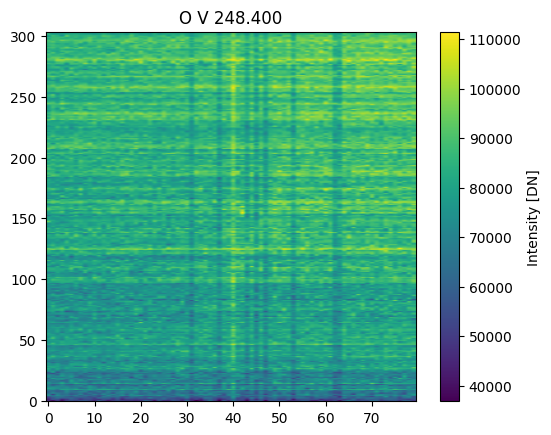

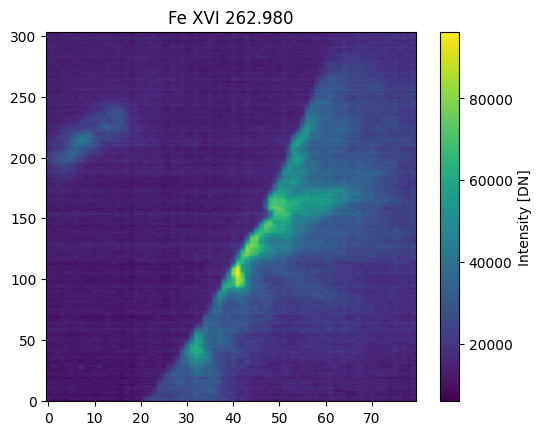

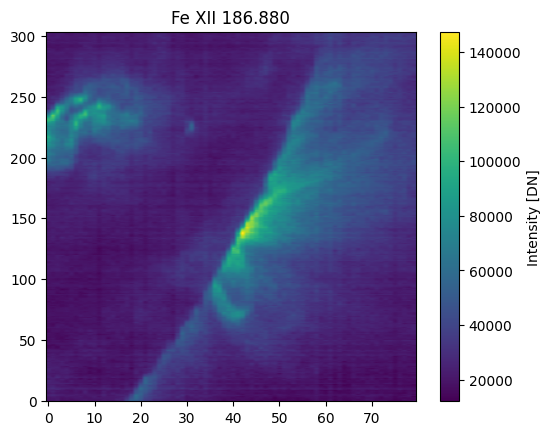

In [7]:
nl,ny,nx=o5.shape
plt.imshow(np.sum(o5,axis=0),aspect=nx/(1.*ny),origin='lower')
plt.title(wn5)
plt.colorbar(label='Intensity [DN]')
plt.show()

nl,ny,nx=fe16.shape
plt.imshow(np.sum(fe16,axis=0),aspect=nx/(1.*ny),origin='lower')
plt.title(wn16)
plt.colorbar(label='Intensity [DN]')
plt.show()

nl,ny,nx=fe7.shape
plt.imshow(np.sum(fe7,axis=0),aspect=nx/(1.*ny),origin='lower')
plt.title(wn7)
plt.colorbar(label='Intensity [DN]')
plt.show()


(8, 104, 41)


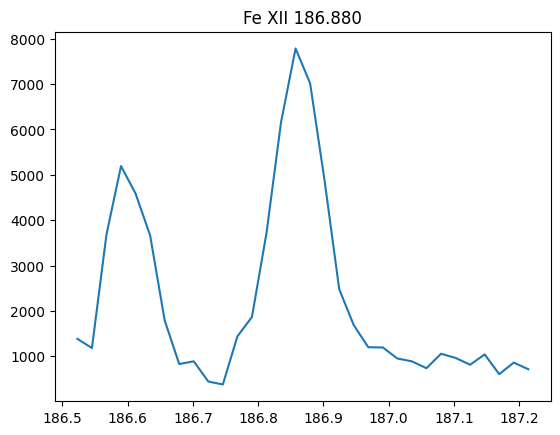

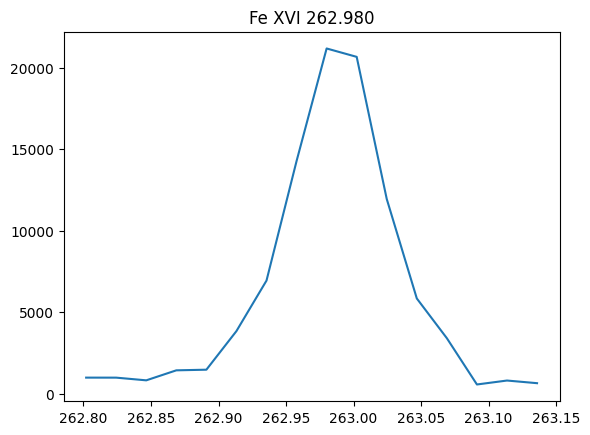

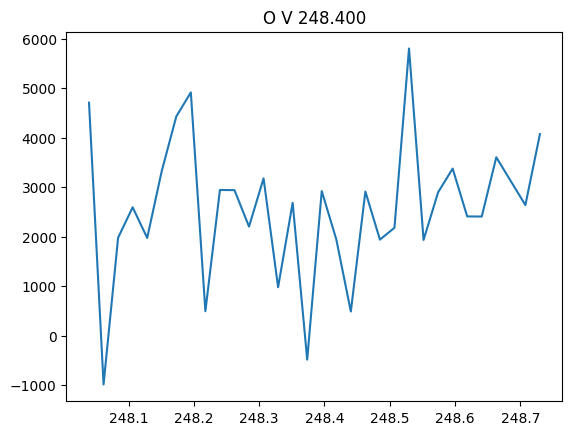

In [8]:
# Plot spectra at brightest fe16 location
max_index = np.unravel_index(np.argmax(fe16), fe16.shape)
print(max_index)

plt.plot(wvl7,fe7[:,max_index[1],max_index[2]])
plt.title(wn7)
plt.show()

plt.plot(wvl16,fe16[:,max_index[1],max_index[2]])
plt.title(wn16)
plt.show()

plt.plot(wvl5,o5[:,max_index[1],max_index[2]])
plt.title(wn5)
plt.show()